In [1]:
import sys
sys.path.append('..')
from dnn import DNN
from dbn import DBN
from load_data import *

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

# Load data

In [2]:
binary_alpha = lire_alpha_digits(['A', 'E', 'X', '4'])

In [3]:
X_train, y_train, X_test, y_test = load_mnist()

# Hyperparameters

In [4]:
epochs = 3000
batch_size = 512
learning_rate = 1e-3
patience = 10

nb_layers = 3
neurons = [256, 256, 256]

# Alpha Digits

In [5]:
dbn_alpha = DBN(X=binary_alpha, L=nb_layers, qs=neurons, use_adam=True)

In [6]:
dbn_alpha.train_DBN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [00:34<00:00, 11.38s/rbm, total_loss=0.0452]


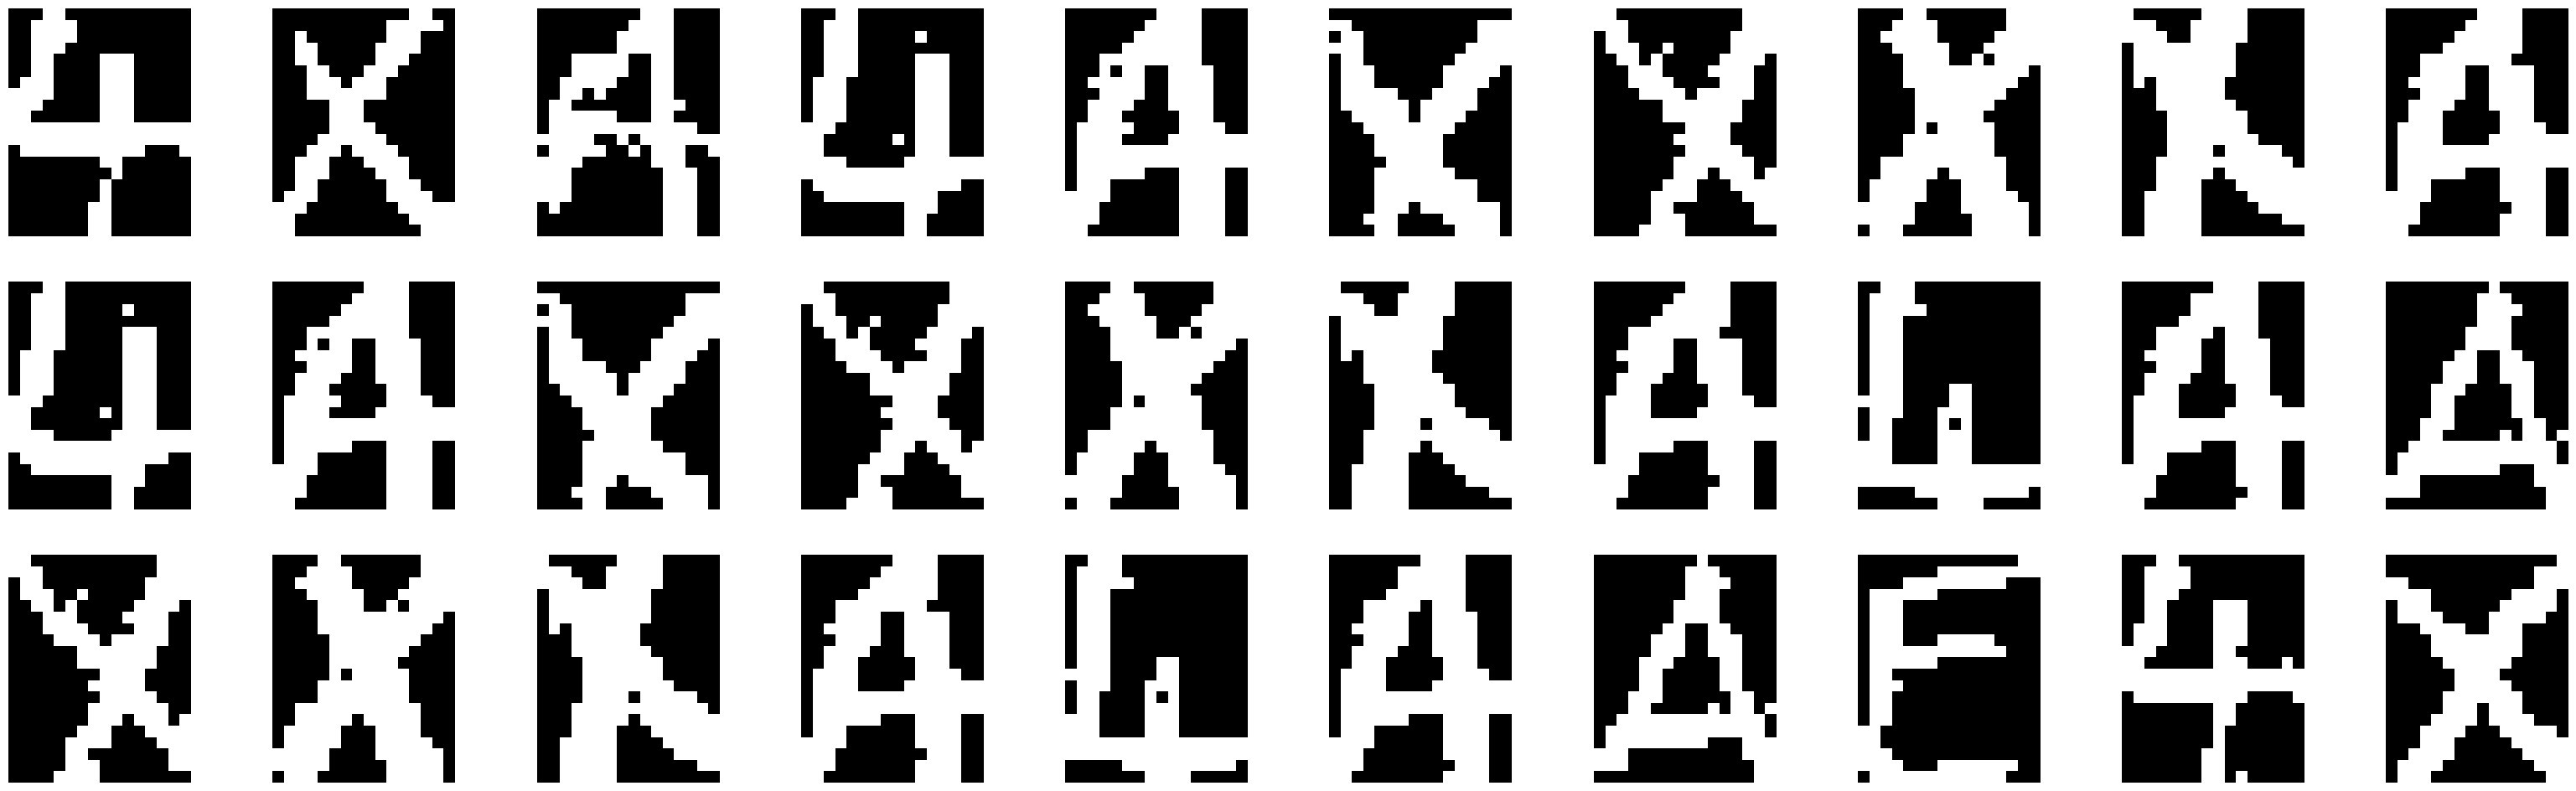

In [7]:
alpha_gen = dbn_alpha.generer_image_DBN(num_samples=30, gibbs_steps=1000, image_size=(20, 16))

# MNIST

### No pretrain - SGD

In [8]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)

Epoch 0:: loss: 2.063, val_loss: 1.1964 ; accuracy: 29.64%, val_accuracy: 62.44%
Epoch 50:: loss: 0.0552, val_loss: 0.0944 ; accuracy: 98.46%, val_accuracy: 96.99%
##### Patience triggered at epoch 85! #####
Epoch 85:: loss: 0.0165, val_loss: 0.088 ; accuracy: 99.7%, val_accuracy: 97.35%


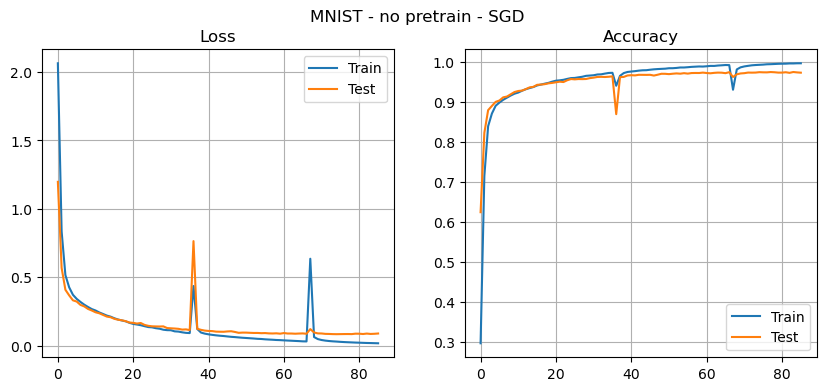

In [9]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=50,
    suptitle='MNIST - no pretrain - SGD')

### No pretrain - Adam

In [10]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)

Epoch 0:: loss: 1.4493, val_loss: 0.4552 ; accuracy: 59.66%, val_accuracy: 87.63%
##### Patience triggered at epoch 28! #####
Epoch 28:: loss: 0.0037, val_loss: 0.1004 ; accuracy: 99.98%, val_accuracy: 97.53%


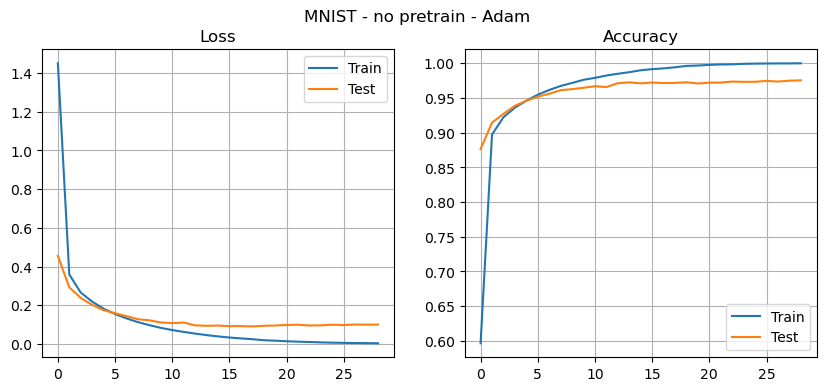

In [11]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=50,
    suptitle='MNIST - no pretrain - Adam')

### Pretrain - SGD

In [10]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)
dnn.pretrain_DNN(epochs=100, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [44:48<00:00, 896.20s/rbm, total_loss=0.155]


Epoch 0:: loss: 0.5685, val_loss: 0.3085 ; accuracy: 86.67%, val_accuracy: 92.32%
Epoch 50:: loss: 0.0648, val_loss: 0.0848 ; accuracy: 98.2%, val_accuracy: 97.36%
Epoch 100:: loss: 0.0354, val_loss: 0.0711 ; accuracy: 99.18%, val_accuracy: 97.79%
Epoch 150:: loss: 0.0213, val_loss: 0.0674 ; accuracy: 99.6%, val_accuracy: 97.95%
##### Patience triggered at epoch 179! #####
Epoch 179:: loss: 0.0164, val_loss: 0.0669 ; accuracy: 99.74%, val_accuracy: 98.02%


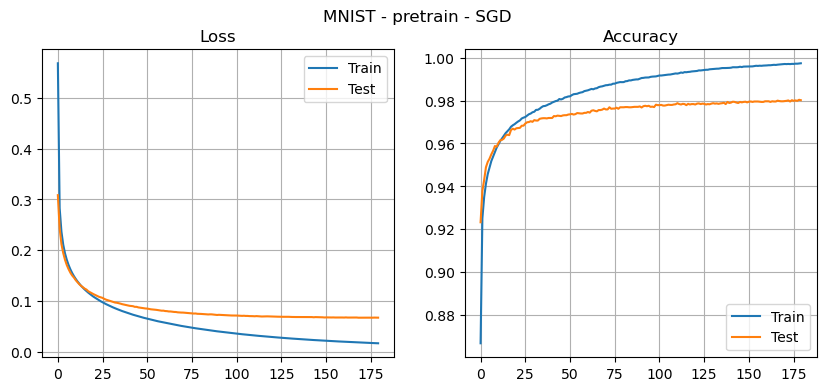

In [11]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=50,
    suptitle='MNIST - pretrain - SGD')

### Adam

In [5]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)
dnn.pretrain_DNN(epochs=100, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [1:00:47<00:00, 1215.70s/rbm, total_loss=0.192]


Epoch 0:: loss: 0.6347, val_loss: 0.2899 ; accuracy: 82.4%, val_accuracy: 92.22%
Epoch 50:: loss: 0.0399, val_loss: 0.0672 ; accuracy: 99.03%, val_accuracy: 97.96%
Epoch 100:: loss: 0.0024, val_loss: 0.0545 ; accuracy: 100.0%, val_accuracy: 98.44%
##### Patience triggered at epoch 103! #####
Epoch 103:: loss: 0.002, val_loss: 0.0546 ; accuracy: 100.0%, val_accuracy: 98.46%


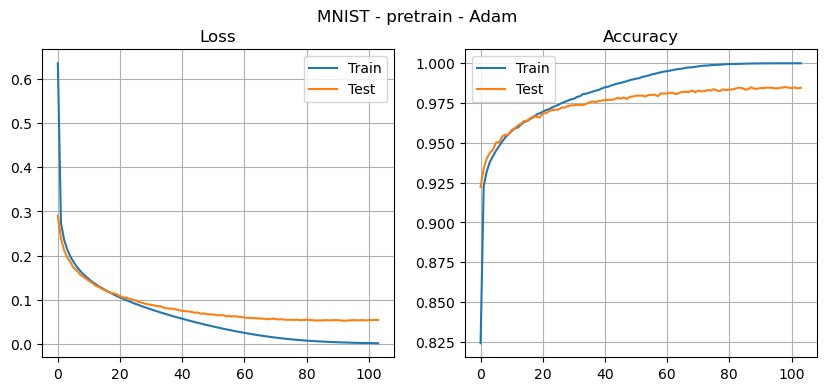

In [6]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, print_error_every=50,
    suptitle='MNIST - pretrain - Adam')